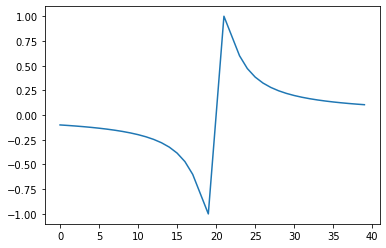

In [9]:
### this is the unofficial implementation of Jaccard Vector Similarity(JVS)
### Basura Fernando and Samitha Herath, "Anticipating human actions by correlating past with the future with Jaccard similarity measures", CVPR, 2021

import torch
import matplotlib.pyplot as plt
### unofficial implementation of jacard vector similarity 
def jaccard_vector_similarity(Z_h, Z_t):
  similarity = (2*(torch.dot(Z_h,Z_t)))/(torch.dot(Z_h,Z_h) + torch.dot(Z_t,Z_t))
  return similarity

vec = torch.rand([512])
k_val = range(-20,20)
sims = []

for k in k_val:
  kvec = k*vec
  sims.append(jaccard_vector_similarity(vec,kvec))

plt.plot(sims)



